1.By using distribution=np.random.name_distribution([],[]), write the name of distribution of your choice in place of name_distributionand fill out the bracket with your choice again. Then please, a) Draw the histogram and interpret b) Draw Q-Q plot and interpret

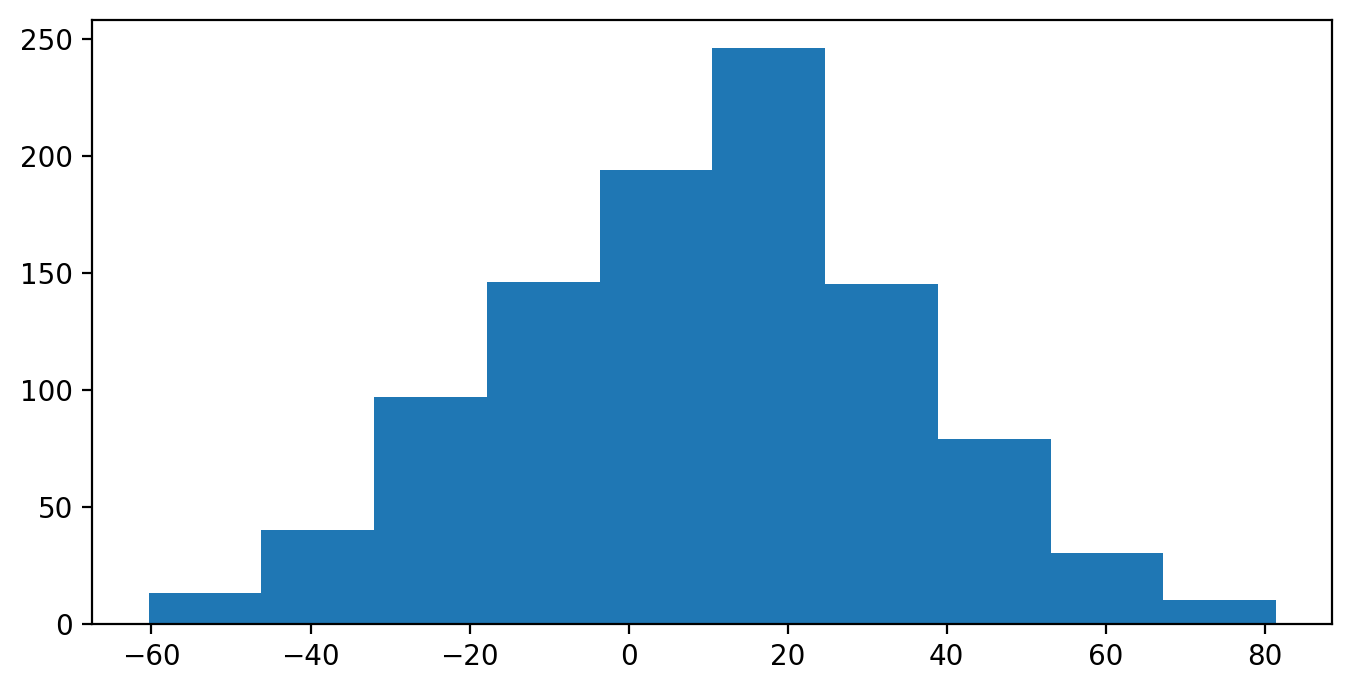

In [69]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

normal_distribution = np.random.normal(10, 25, 1000)
standart_normal_distribution = np.random.normal(0, 1, 1000)

plt.figure(figsize=(8,4), dpi = 200)
plt.hist(normal_distribution)

plt.show()

Histograma bakıldığında, 10 civarında ortalaması  ve yaklaşık olarak simetrik bir görüntü oluşturması normal dağılıma yakın olduğu söylenebilir.

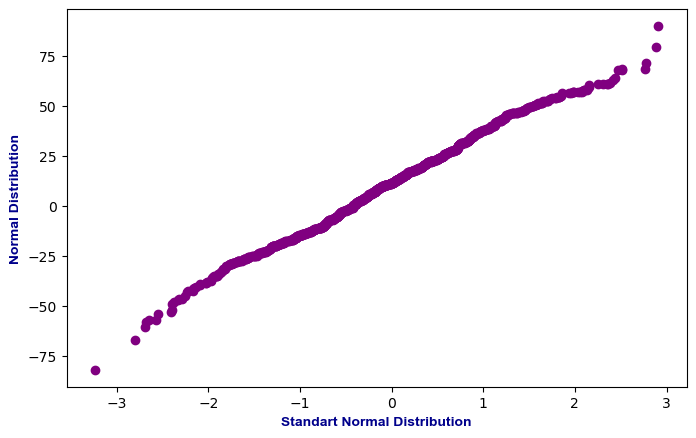

In [40]:
standart_normal_distribution = np.random.normal(0, 1, 1000)
normal_distribution.sort()
standart_normal_distribution.sort(),

plt.figure(figsize=(8,5), dpi = 100)
plt.plot(standart_normal_distribution, normal_distribution, "o", color = "purple") 
plt.ylabel('Normal Distribution', fontdict = axis_font) 
plt.xlabel('Standart Normal Distribution', fontdict = axis_font)
plt.show()

Yaklaşık olarak aynı hat üzerinde ilerleyip, qqlarına baktığımızda birbirlerine denk geldiği için aynı dağılımdan geldiğini söyleyebiliriz. 

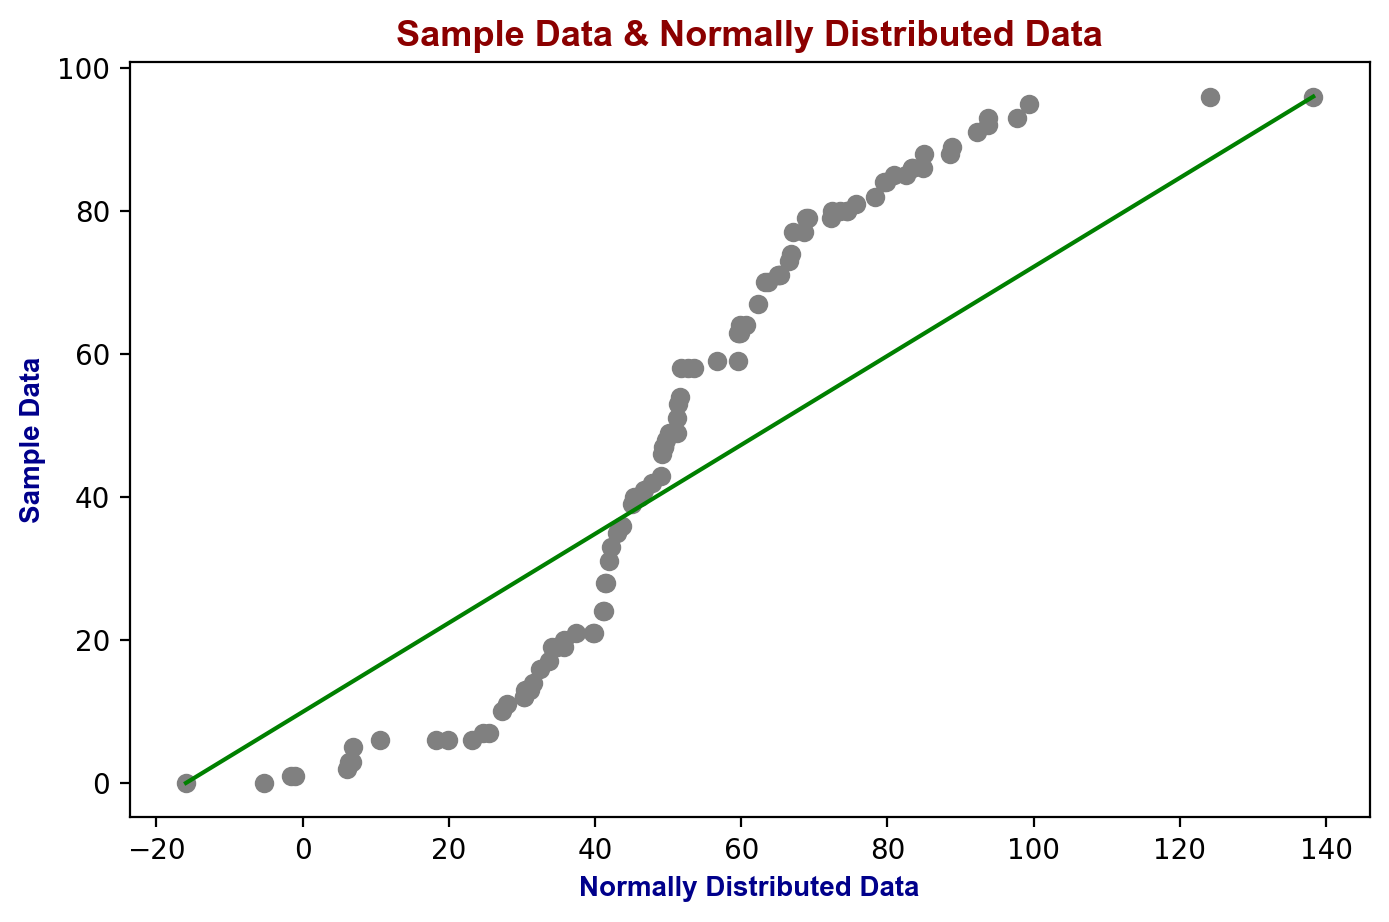

In [41]:
sample_dataset_1 = np.random.randint(0,100,100)
normally_distributed_data = np.random.normal(np.mean(sample_dataset_1),
                                         np.std(sample_dataset_1), len(sample_dataset_1))

sample_dataset_1.sort()
normally_distributed_data.sort()

plt.figure(figsize=(8,5), dpi = 200)

plt.title('Sample Data & Normally Distributed Data', fontdict = title_font)
plt.ylabel('Sample Data', fontdict = axis_font)
plt.xlabel('Normally Distributed Data', fontdict = axis_font)
plt.scatter(normally_distributed_data, sample_dataset_1,color="gray")
plt.plot([np.min(normally_distributed_data), np.max(normally_distributed_data)],
         [np.min(sample_dataset_1), np.max(sample_dataset_1)], c='green')
plt.show()

Oluşturduğum Dataset, 45 derecelik çizgi üzerinde dalgalanmalar oluşturarak devam ettiği için normal dağılmadığını söyleyebiliriz. Sadece uç kısımlarda aykırılık olsaydı tolere edilebilip normal dağılıma uyduğunu söyleyebilirdik.  

2- Get the google stock quotes from 2015-2017 using https://finance.yahoo.com/. Using this data, calculate the stock return with the following formula:

Pt−Pt−1/Pt−1
 
where  Pt  represents the stock price at time t and  Pt−1  denotes the stock price at time t-1. What do you think about the return distribution?


In [45]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings("ignore")

stock = "GOOG"
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2017,12,31)
google = yf.download(stock,start=start,end=end,interval="1d")

[*********************100%***********************]  1 of 1 completed


In [47]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,529.795471,531.141724,524.360352,524.958740,524.958740,1368200
2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500
2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900
2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000


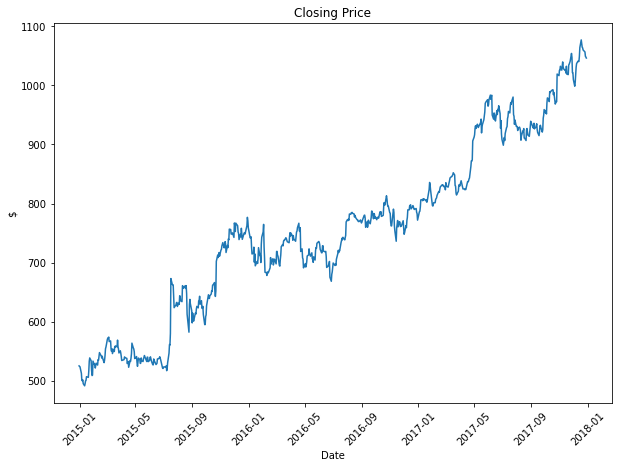

In [54]:
plt.figure(figsize=(10,7))
plt.plot(google.Close)
plt.title("Closing Price")
plt.xlabel("Date")
plt.ylabel("$")
plt.xticks(rotation =45)
plt.show()


In [57]:
google.describe() #ortalamarı verir

,Open,High,Low,Close,Adj Close,Volume
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,755.119362,760.730964,749.156149,755.232845,755.232845,1.792595e+06
std,147.270798,147.718350,147.034907,147.528636,147.528636,9.293647e+05
min,493.295654,494.618011,486.225067,491.201416,491.201416,5.272000e+05
25%,654.532486,660.998749,644.148758,651.632477,651.632477,1.253275e+06
50%,752.884979,758.106018,745.845001,751.664978,751.664978,1.572600e+06
75%,834.910019,841.124985,829.910004,835.957489,835.957489,2.043900e+06
max,1075.199951,1078.489990,1063.550049,1077.140015,1077.140015,1.116490e+07


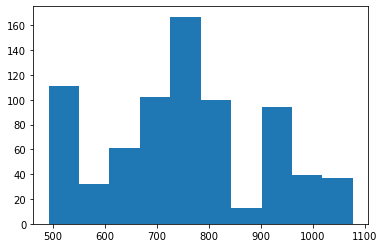

In [60]:
plt.hist(google.Close); #noktalı virgül gelen yazıyı göstermemek için kullanılır.

Histograma bakıldığında simetrik olmayışı, normal dağılıma uymadığı gözlemlenebilir.

$$r_t=\frac{P_t-P_{t-1}}{P_{t-1}}$$


In [71]:
closing_price = google.Close

google_return = closing_price.pct_change().dropna()

test_stat, p_value = stats.normaltest(google_return)

print("The Normal test satistic is {} and p-value is {}".format(test_stat,p_value))

The Normal test satistic is 465.1816708239681 and p-value is 9.706968924822293e-102


H0 = Veri Normal Dağılıma Uyar
Ha = Veri Normal Dağılıma Uymaz 

p değeri anlamlılık düzeyi 0.05 ten düşük olduğu için (Ha) normal dağılıma uymaz sonucunu çıkarabiliriz. 

In [74]:
google_return_sorted = google_return.sort_values()

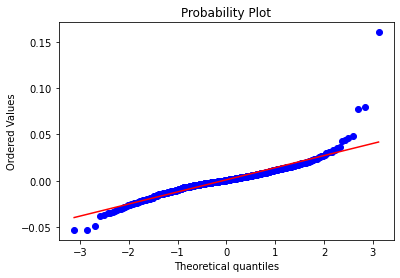

In [79]:
import pylab
import scipy.stats as stats

stats.probplot(google_return_sorted, dist = "norm",plot = pylab)
pylab.show()

Uç noktalara doğru fazla sapma olduğundan dolayı QQ plot 'a bakarak normal dağılıma uymadığını söyleyebiliriz. 